# Visualization

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sqlalchemy import create_engine

## Loading clean data

In [2]:
clean_data = 'clean_medical_insurance_cost.csv'

df = pd.read_csv(clean_data)
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_status,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,2.Overweight,19-34
1,18,male,33.770,1,no,southeast,1725.55230,3.Obese,18-19
2,28,male,33.000,3,no,southeast,4449.46200,3.Obese,19-34
3,33,male,22.705,0,no,northwest,21984.47061,1.Normal,19-34
4,32,male,28.880,0,no,northwest,3866.85520,2.Overweight,19-34


In [3]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   weight_status  1338 non-null   object 
 8   age_group      1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [5]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_status,age_group
0,19,0,27.900,0,1,3,16884.92400,2.Overweight,19-34
1,18,1,33.770,1,0,2,1725.55230,3.Obese,18-19
2,28,1,33.000,3,0,2,4449.46200,3.Obese,19-34
3,33,1,22.705,0,0,1,21984.47061,1.Normal,19-34
4,32,1,28.880,0,0,1,3866.85520,2.Overweight,19-34


In [8]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

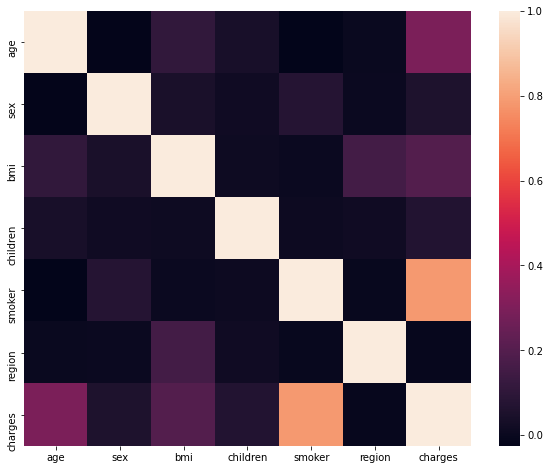

In [9]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr());

# The top 4 features that effect the insurance cost: smoker, age, bmi, children

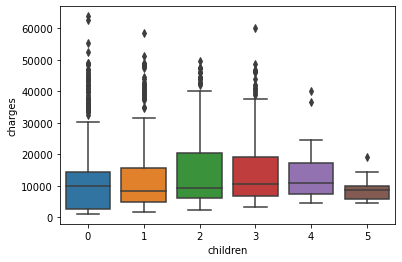

In [10]:
sns.boxplot(x='children', y='charges', data=df)

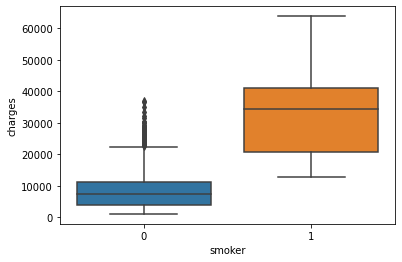

In [11]:
sns.boxplot(x='smoker', y='charges', data=df)

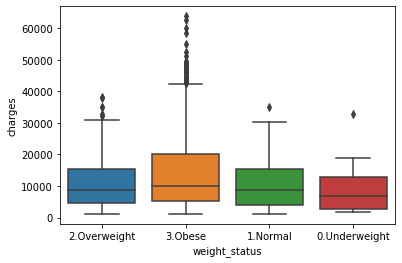

In [12]:
sns.boxplot(x='weight_status', y='charges', data=df)

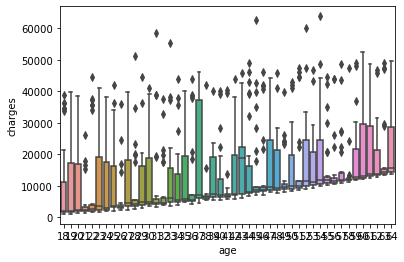

In [13]:
sns.boxplot(data = df , x = 'age' , y = 'charges')

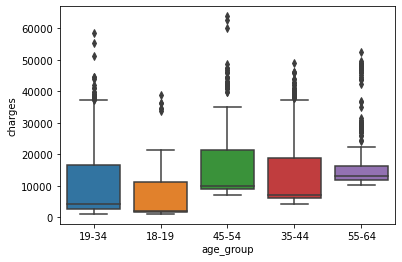

In [14]:
sns.boxplot(x='age_group', y='charges', data=df)

## Dataset Distribution

In [15]:
# Regions 
regions = ['southwest', 'southeast', 'northwest', 'northeast']

### General distribution of all regions

The average cost of each region: region
0    13406.384516
1    12417.575374
2    14735.411438
3    12346.937377
Name: charges, dtype: float64
The average cost of all regions: 13226.577176314308


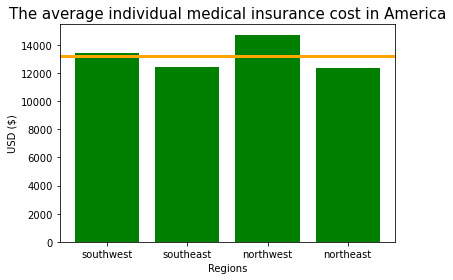

In [16]:
# --------------- COST --------------
avg_charges = df.groupby('region').charges.mean()
print(f'The average cost of each region: {avg_charges}')
print(f'The average cost of all regions: {avg_charges.mean()}')

plt.bar(regions, avg_charges, color='green')
plt.axhline(y=avg_charges.mean(), color='orange', linewidth=3)   # The average cost of all regions
plt.title('The average individual medical insurance cost in America', fontsize = 15)
plt.xlabel('Regions')
plt.ylabel('USD ($)')

plt.show()


In [17]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'charges', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Cost ($)')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [18]:
obj_cols = list(df.select_dtypes(object).columns)
list(obj_cols)

['weight_status', 'age_group']

In [19]:
features = [i for i in df.columns if i not in obj_cols + ['charges', 'age_group']]

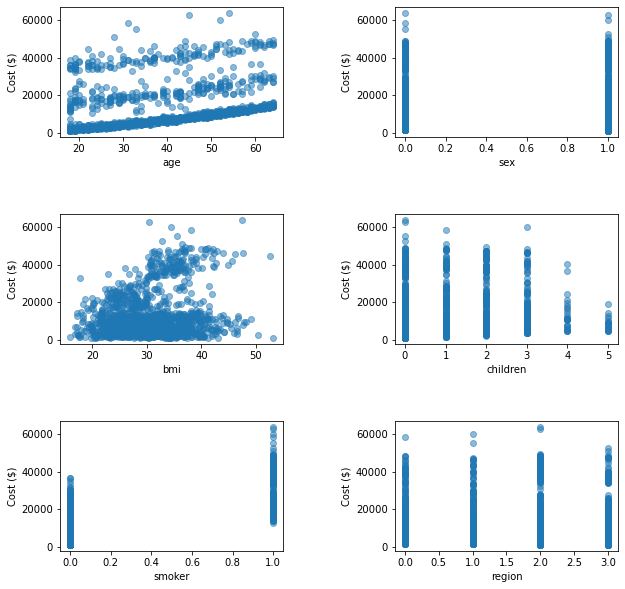

In [20]:
scatterplots(features, ncol=2, figsize=(10, 10))

# Relationship 

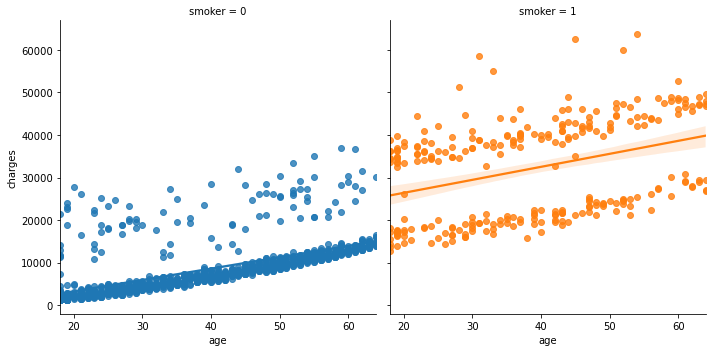

In [27]:
sns.lmplot(x = 'age', y ='charges', hue ='smoker', col = 'smoker', data = df)

Text(0, 0.5, 'Number of people')

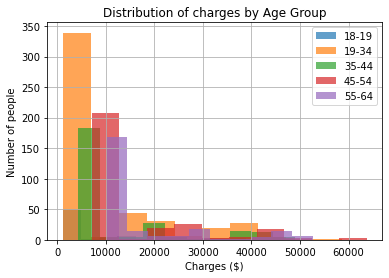

In [22]:
df.groupby('age_group')['charges'].hist(alpha=0.7, legend = True)
plt.title('Distribution of charges by Age Group')
plt.xlabel('Charges ($)')
plt.ylabel('Number of people')

In [23]:
df.groupby('age_group')['charges'].describe().T

age_group,18-19,19-34,35-44,45-54,55-64
count,69.000000,480.000000,260.000000,287.000000,242.000000
mean,7086.217556,10045.212440,13134.168693,15853.927878,18513.276227
std,10198.459989,11775.622733,11788.977468,11725.298493,11352.685347
min,1121.873900,1241.565000,4399.731000,7147.105000,10214.636000
25%,1633.044400,2709.210938,6279.795550,8983.171925,11945.506000
50%,2198.189850,4281.218500,7205.596325,10115.008850,13226.769975
75%,11272.331390,16482.615900,18860.424102,21227.929030,16363.062762
max,38792.685600,58571.074480,48885.135610,63770.428010,52590.829390


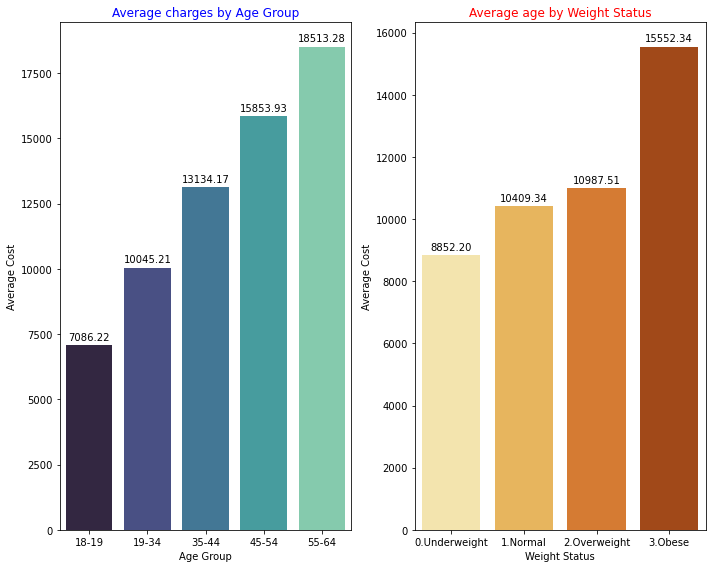

In [24]:
plt.figure(figsize=(10,8))

agegroup_charge_means = df.groupby(by='age_group')[['charges']].mean()
weight_status_charge_means = df.groupby(by='weight_status')[['charges']].mean()

plt.subplot(1,2,1)
age_plots = sns.barplot(x = list(agegroup_charge_means.index), y = list(agegroup_charge_means.charges), palette= "mako")

for bar in age_plots.patches:
    age_plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    xytext=(0, 8),
                   textcoords='offset points')
    
plt.title("Average charges by Age Group", color = "blue")
plt.xlabel("Age Group")
plt.ylabel("Average Cost")



plt.subplot(1,2,2)
weight_status_plots = sns.barplot(x = list(weight_status_charge_means.index), y = list(weight_status_charge_means.charges), palette="YlOrBr")

for bar in weight_status_plots.patches:
    weight_status_plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    xytext=(0, 8),
                   textcoords='offset points')
plt.title("Average age by Weight Status", color = "red")
plt.xlabel("Weight Status")
plt.ylabel("Average Cost")

plt.tight_layout()

plt.show()

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_status,age_group
0,19,0,27.900,0,1,3,16884.92400,2.Overweight,19-34
1,18,1,33.770,1,0,2,1725.55230,3.Obese,18-19
2,28,1,33.000,3,0,2,4449.46200,3.Obese,19-34
3,33,1,22.705,0,0,1,21984.47061,1.Normal,19-34
4,32,1,28.880,0,0,1,3866.85520,2.Overweight,19-34
